## Reducción de dimensionalidad

### Librerías

In [2]:
# Librerías

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # Pre-procesamiento
from sklearn.compose import make_column_transformer # Pre-procesamiento

from sklearn.decomposition import PCA # Reducción de dimensionalidad

from sklearn.model_selection import train_test_split # Dividir datos

from sklearn.neighbors import KNeighborsClassifier # <----- CLASIFICACION
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score # <----- EVALUACION

In [3]:
# Resultados reproducibles
np.random.seed(42)

In [4]:
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='darkgrid', palette='Set2')

### Conjunto de datos

![Wisconsin](https://drive.google.com/uc?id=1PBIR38kvcsCpclGpqUrPRm8bNM2emSgo)

Conjunto de datos relacionado con la predicción del cancer, a partir de 30 atributos numéricos.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/miryamelizabeth/datasets/main/Datasets%20ML/breast_cancer_wisconsin.csv')
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Maligno


In [6]:
# Dimensiones del conjunto de datos
df.shape

(569, 31)

### Visualización

In [7]:
# Separamos predictores (X) de la clase (y)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [8]:
# TODAS las columnas numéricas se guardan en una lista
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


# Creamos el transformer, le indicamos el objeto y las columnas y ajustamos
transformer = make_column_transformer( (StandardScaler(), num_cols) )
transformer.fit(X)

# Transforma los datos
X = transformer.transform(X)

Después de transformar los datos, procedemos a aplicar PCA. Es decir, obtenener los componetes principales y re-dimensionamos el conjunto de datos.

In [9]:
# Creamos objeto PCA, enviamos el número de componentes a obtener (número de atributos/dimensiones)
pca = PCA(n_components=2)
pca.fit(X)

# Convertimos nuestros datos con las nuevas dimensiones de PCA
X = pca.transform(X)

Creamos un DataFrame con el conjunto transformado.

In [10]:
df_pca = pd.DataFrame(data=X, columns=['PC1', 'PC2'])
df_pca['class'] = y
df_pca.head()

,PC1,PC2,class
0,9.192837,1.948583,Maligno
1,2.387802,-3.768172,Maligno
2,5.733896,-1.075174,Maligno
3,7.122953,10.275589,Maligno
4,3.935302,-1.948072,Maligno


**`explained_variance_ratio_`**

Proporciona la cantidad de información que tiene cada componente principal después de proyectar los datos a un sub-espacio de menor dimensión.

Los resultados obtenidos:
* El componente principal 1 contiene el 44.2% de la información, mientras que el componente principal 2 sólo contiene el 18.9% de la información.
* Al proyectar los datos a sólo dos dimensiones (originalmente tenía 30), se perdió sólo 36.8% de información.

In [11]:
variance = pca.explained_variance_ratio_ 
sum_variance = sum(variance)

print(f'Variabilidad explicada por componente principal: {variance}\n')
print(f'Variabilidad explicada acumulada: {sum_variance:.3f}')

Variabilidad explicada por componente principal: [0.44272026 0.18971182]

Variabilidad explicada acumulada: 0.632


Graficamos las 569 muestras a lo largo del eje del componente principal 1 y del componente principal 2. Esto dará una buena idea de cómo se distribuyen las muestras entre las dos clases.

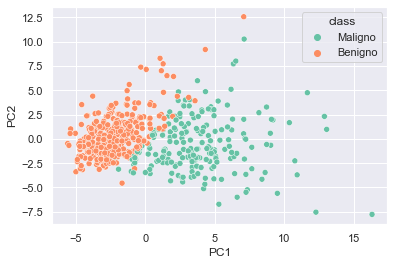

In [12]:
sns.scatterplot(x='PC1', y='PC2', hue='class', data=df_pca)
plt.show()

### Training set (speed up and improvement)

In [13]:
# Separamos predictores (X) de la clase (y)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [14]:
# Creamos conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# TODAS las columnas numéricas se guardan en una lista
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


# Creamos el transformer, le indicamos el objeto y las columnas y ajustamos
transformer = make_column_transformer( (StandardScaler(), num_cols) )
transformer.fit(X_train)


# Transforma los datos de entrenamiento y prueba
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [16]:
#@title Modelos entrenados antes de PCA
classification_models = {'Logistic Regression': LogisticRegression(solver='liblinear'),
                         'DT': DecisionTreeClassifier(),
                         'KNN': KNeighborsClassifier()
                         }

for name, model in classification_models.items():
    
    print(f'------ {name} ------')
    
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    
    print(f'Test accuracy = {accuracy:.2f} %')
    print(f'Tiempo: {time.time() - start_time:.3f} seconds\n')

------ Logistic Regression ------
Test accuracy = 98.25 %
Tiempo: 0.002 seconds

------ DT ------
Test accuracy = 92.11 %
Tiempo: 0.007 seconds

------ KNN ------
Test accuracy = 95.61 %
Tiempo: 0.005 seconds



Pasemos 0.9 como parámetro al modelo PCA, lo que significa que PCA retendrá el 90% de la varianza y se utilizará el número de componentes necesarios para capturar el 90% de la varianza.

En el ejemplo anterior se utilizó `n_componentes` como parámetro y entonces obtuvimos cuánta varianza fue capturada por esos componentes. En este caso, **mencionamos explícitamente cuánta varianza queremos que capture PCA**, por lo tanto, el número de componentes variarán en función del parámetro de varianza.

In [17]:
# Creamos objeto PCA, enviamos un mínimo "explicado" (de este valor dependerá el número de atributos que se obtengan)
pca = PCA(n_components=0.90)
pca.fit(X_train)

# Convertimos nuestros datos de entrenamiento y prueba con las nuevas dimensiones de PCA
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [18]:
variance = pca.explained_variance_ratio_
sum_variance = sum(variance)
num_components = pca.n_components_

print(f'Variabilidad explicada por componente principal: {variance}\n')
print(f'Variabilidad explicada acumulada: {sum_variance:.3f}\n')
print(f'Número de componentes obtenidos: {num_components}')

Variabilidad explicada por componente principal: [0.44626751 0.18679243 0.0925651  0.06796232 0.055718   0.03897496
 0.02354835]

Variabilidad explicada acumulada: 0.912

Número de componentes obtenidos: 7


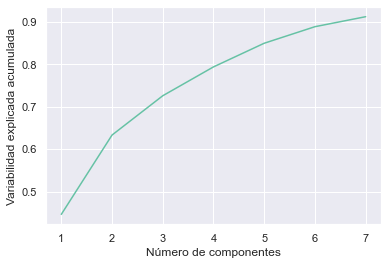

In [19]:
#@title Gráfica del acumulado de varianza explicada en las nuevas dimensiones
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variabilidad explicada acumulada')
plt.show()

Creamos nuestros modelos de clasificación, con el conjunto de datos redimensionado.

In [20]:
classification_models = {'Logistic Regression': LogisticRegression(solver='liblinear'),
                         'DT': DecisionTreeClassifier(),
                         'KNN': KNeighborsClassifier()
                         }

for name, model in classification_models.items():
    
    print(f'------ {name} ------')
    
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    
    print(f'Test accuracy = {accuracy:.2f} %')
    print(f'Tiempo: {time.time() - start_time:.3f} seconds\n')

------ Logistic Regression ------
Test accuracy = 95.61 %
Tiempo: 0.002 seconds

------ DT ------
Test accuracy = 91.23 %
Tiempo: 0.002 seconds

------ KNN ------
Test accuracy = 95.61 %
Tiempo: 0.004 seconds




---


📝 **Referencias**

*Dataset obtenido de Kaggle repository:* [Breast Cancer Wisconsin dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)